In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [36]:
data = pd.read_csv('MIKRO2019.csv')

C:\Users\angel\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (12,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
data.head(3)

,No Kontrak,Cabang,Nama Kelompok,Nama Debitur,Produk Penyertaan,POT,Tenor,Tanggal Lahir Debitur,Status Perkawinan,Kelurahan Debitur,...,Aging Pastdue,Keterangan Past Due,OSP,Pendidikan Debitur,Jenis Kelamin,Keterangan Bisnis Checking,Bagi Hasil,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak
0,005.0117.0073,CIKUPA,KP KUTRUK,DENSIH WINENGSIH,MIKRO,MIKRO-1 (10/40),40,23-08-87,MENIKAH,TAPOS,...,856,WO,2205811,SMP,PEREMPUAN,YA,75000,MENAMBAH MODAL USAHA,YES,WO
1,005.0117.0113,CIKUPA,KP PEUSAR 2 RO,YUNITA SARI,MIKRO,MIKRO-1 (10/40),40,02-06-86,MENIKAH,PANONGAN,...,789,WO,1844125,SMA,PEREMPUAN,YA,75000,MENAMBAH MODAL USAHA,NO,WO
2,005.0118.0127,CIKUPA,KP JAHA,ENDAH,MIKRO,MIKRO UTJ+ (2.300/40),40,02-10-65,MENIKAH,MALANG NENGAH,...,360,WO,1546733,SD,PEREMPUAN,YA,85000,MENAMBAH MODAL USAHA,NO,WO


In [38]:
data.tail(3)

,No Kontrak,Cabang,Nama Kelompok,Nama Debitur,Produk Penyertaan,POT,Tenor,Tanggal Lahir Debitur,Status Perkawinan,Kelurahan Debitur,...,Aging Pastdue,Keterangan Past Due,OSP,Pendidikan Debitur,Jenis Kelamin,Keterangan Bisnis Checking,Bagi Hasil,Penggunaan Dana Investasi,Angsuran Tempat lain,Status Kontrak
127383,127.0619.0019,KCP CILEGON,LINGKUNGAN KUBANG LAMPIT,YUSMI ASTUTI,MIKRO,"MIKRO NEW (3,460/40)",40,28-08-95,MENIKAH,TEGAL BUNDER,...,-5,CURRENT,3459999,SMA,PEREMPUAN,YA,129000,MENAMBAH MODAL USAHA,NO,LIVE
127384,127.0619.0020,KCP CILEGON,LINGKUNGAN KUBANG LAMPIT,WARNI,MIKRO,"MIKRO NEW (3,460/40)",40,03-07-77,MENIKAH,TEGAL BUNDER,...,-5,CURRENT,3459999,SD,PEREMPUAN,YA,129000,MENAMBAH MODAL USAHA,YES,LIVE
127385,127.0619.0021,KCP CILEGON,LINGKUNGAN KUBANG LAMPIT,SRI PURWANINGSIH,MIKRO,"MIKRO NEW (3,460/40)",40,14-10-73,MENIKAH,TEGAL BUNDER,...,-5,CURRENT,3459999,SD,PEREMPUAN,YA,129000,MENAMBAH MODAL USAHA,NO,LIVE


In [39]:
data['Lama Tinggal'] = data['Lama Tinggal'].str.extract('(\d+) ,0 Tahun')

In [40]:
data['Lama Usaha'] = data['Lama Usaha'].apply(lambda x: int(x.split(',')[0])*12 + int(x.split(',')[1]))

In [41]:
data.corr()

,Tenor,Nilai Funding,Lama Usaha,Aging Pastdue,OSP,Bagi Hasil
Tenor,1.000000,0.300631,0.028920,0.013702,-0.075471,-0.413676
Nilai Funding,0.300631,1.000000,0.091382,-0.179098,0.625988,0.666951
Lama Usaha,0.028920,0.091382,1.000000,-0.011510,0.060707,0.062525
Aging Pastdue,0.013702,-0.179098,-0.011510,1.000000,-0.164253,-0.180304
OSP,-0.075471,0.625988,0.060707,-0.164253,1.000000,0.654129
Bagi Hasil,-0.413676,0.666951,0.062525,-0.180304,0.654129,1.000000


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127386 entries, 0 to 127385
Data columns (total 38 columns):
No Kontrak                    127386 non-null object
Cabang                        127386 non-null object
Nama Kelompok                 127350 non-null object
Nama Debitur                  127386 non-null object
Produk Penyertaan             127386 non-null object
POT                           127386 non-null object
Tenor                         127386 non-null int64
Tanggal Lahir Debitur         127385 non-null object
Status Perkawinan             127386 non-null object
Kelurahan Debitur             127386 non-null object
Kecamatan Debitur             127386 non-null object
Kota                          127386 non-null object
Kode Pos                      127386 non-null object
Alamat Debitur                127386 non-null object
Status Rumah                  127386 non-null object
Lama Tinggal                  122970 non-null object
Nilai Funding                 127386 non-n

In [43]:
data.drop(['No Kontrak', 'Keterangan Past Due', 'Nama Debitur', 'Produk Penyertaan', 'Kode Pos', 'Kode Pos.1', 'POT'], axis=1, inplace=True)

In [44]:
data.isna().sum()

Cabang                           0
Nama Kelompok                   36
Tenor                            0
Tanggal Lahir Debitur            1
Status Perkawinan                0
Kelurahan Debitur                0
Kecamatan Debitur                0
Kota                             0
Alamat Debitur                   0
Status Rumah                     0
Lama Tinggal                  4416
Nilai Funding                    0
Referensi                        0
Jenis Usaha                      0
Nama Kegiatan Usaha              0
Bentuk Usaha                     0
Lama Usaha                       0
Kelurahan Tempat Usaha           0
Kecamatan Tempat Usaha           1
Kota.1                           0
Alamat Tempat Usaha              0
Nama Surveyor                    0
Aging Pastdue                    0
OSP                              0
Pendidikan Debitur               1
Jenis Kelamin                    1
Keterangan Bisnis Checking       0
Bagi Hasil                       0
Penggunaan Dana Inve

In [45]:
data = data.dropna()

In [46]:
print('Number of rows in the dataset:', data.shape[0])
print('Number of columns in the dataset:', data.shape[1])

Number of rows in the dataset: 122935
Number of columns in the dataset: 31


In [47]:
data.describe()

,Tenor,Nilai Funding,Lama Usaha,Aging Pastdue,OSP,Bagi Hasil
count,122935.000000,1.229350e+05,122935.000000,122935.000000,1.229350e+05,122935.000000
mean,36.875121,3.269512e+06,71.801578,14.016293,2.553793e+06,132108.593972
std,6.784152,8.440069e+05,81.141711,89.968591,9.691150e+05,41582.093837
min,4.000000,2.777780e+05,0.000000,-19.000000,-1.000000e+00,40000.000000
25%,40.000000,2.360000e+06,24.000000,0.000000,1.844232e+06,98000.000000
50%,40.000000,3.460000e+06,36.000000,0.000000,2.422678e+06,129000.000000
75%,40.000000,3.660000e+06,96.000000,0.000000,3.353653e+06,140000.000000
max,52.000000,6.650000e+06,3600.000000,1164.000000,6.464997e+06,387000.000000


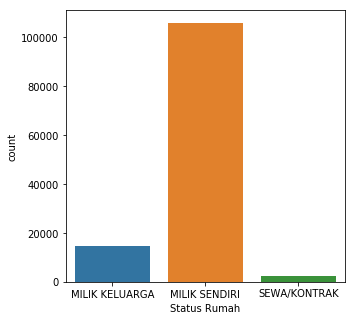

In [48]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Rumah', data=data)
plt.show()

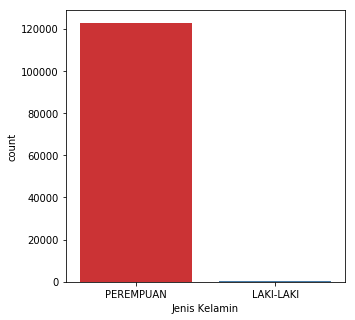

In [49]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Jenis Kelamin', data=data, palette="Set1")
plt.show()

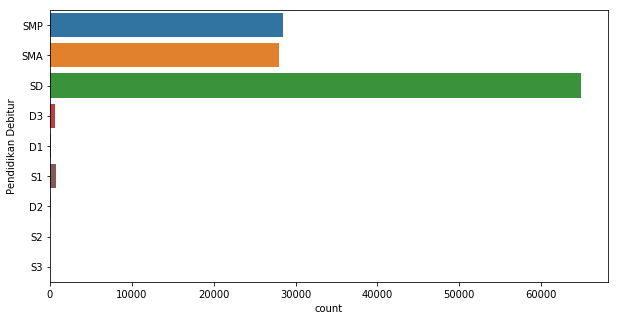

In [50]:
fig = plt.figure(figsize=(10,5))
sns.countplot (y='Pendidikan Debitur', data=data)
plt.show()

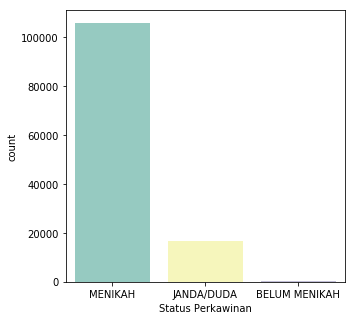

In [51]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Status Perkawinan', data=data, palette="Set3")
plt.show()

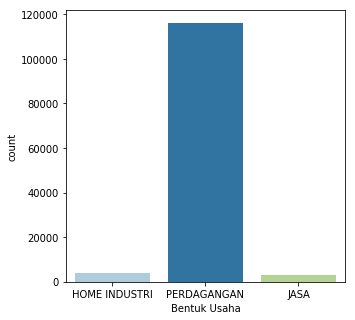

In [52]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Bentuk Usaha', data=data, palette="Paired")
plt.show()

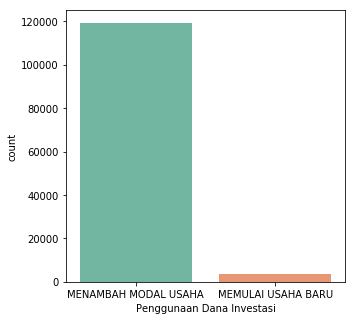

In [53]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Penggunaan Dana Investasi', data=data, palette="Set2")
plt.show()

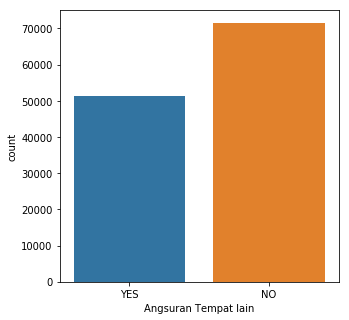

In [54]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='Angsuran Tempat lain', data=data)
plt.show()

In [55]:
data['Referensi'].value_counts()

RO                   52447
MEMBER GET MEMBER    25648
PENGGEMUKAN          25147
DERET CACAH          17563
WALK-IN               1327
TEMAN/TETANGGA         450
BROSUR                 186
SAUDARA/KELUARGA       101
AGEN                    48
MITRA                   16
INTERNET                 1
SPANDUK                  1
Name: Referensi, dtype: int64

In [56]:
data_num = data.copy()

In [57]:
data_num.fillna({'Nama Kelompok': 'Unknown', 'Lama Tinggal': 0}, inplace=True)

In [58]:
data_num['Lama Tinggal'] = data_num['Lama Tinggal'].astype(int)

In [59]:
#data_num['Kode Pos'] = data_num['Kode Pos'].replace('-', 0)
#data_num['Kode Pos'] = data_num['Kode Pos'].astype(int)

In [60]:
data_num.loc[:, data_num.dtypes == 'object'] = data_num.loc[:, data_num.dtypes == 'object'].apply(lambda x:LabelEncoder().fit_transform(x), axis=0)

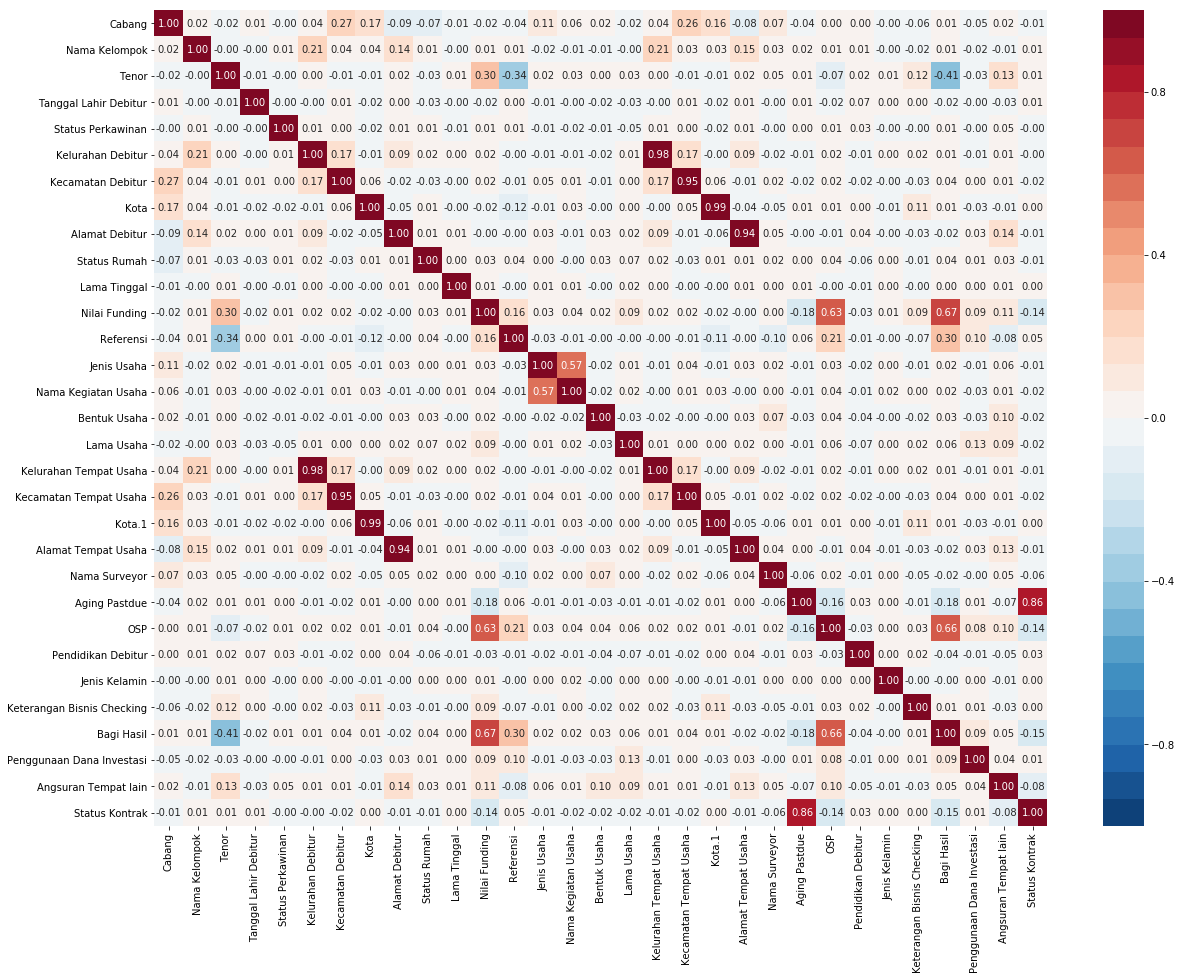

In [61]:
datacorr = data_num.corr()
plt.figure(figsize=(20,15))
sns.heatmap(datacorr, vmin=-1, vmax=1, cmap=sns.color_palette("RdBu_r", 30), annot=True, fmt='.2f')

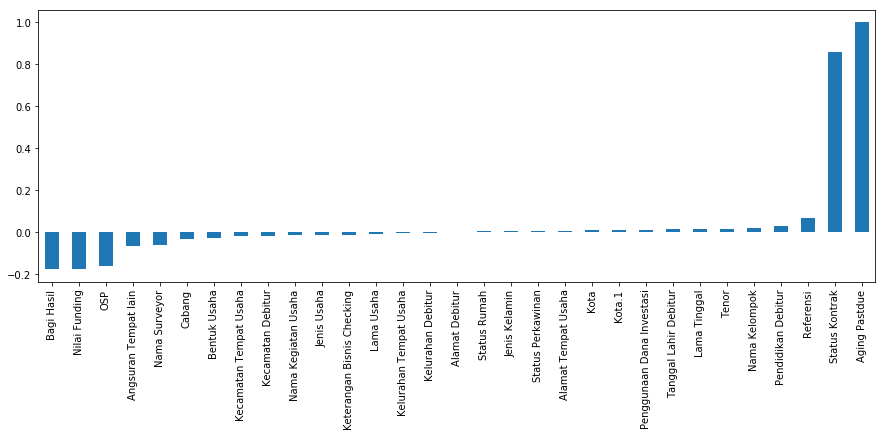

In [62]:
datacorr['Aging Pastdue'].sort_values().plot(kind='bar', figsize=(15,5))

In [63]:
X = data_num.drop(columns='Aging Pastdue')
y = data_num['Aging Pastdue']

In [64]:
rf = RandomForestRegressor(n_estimators=20, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
rf_pred = cross_val_predict(rf, X, y, cv=kf)
print('R2:', r2_score(y, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, rf_pred)))

R2: 0.816677846551489
RMSE: 38.520918049420324


Text(0, 0.5, 'Predicted')

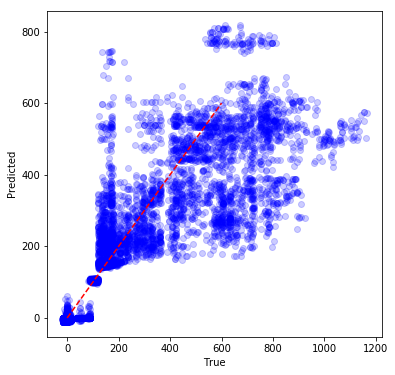

In [65]:
plt.figure(figsize=(6,6))
plt.plot(y, rf_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

In [66]:
gb = GradientBoostingRegressor(n_estimators=20, max_depth=8)
kf = KFold(n_splits=5, random_state=123)
gb_pred = cross_val_predict(gb, X, y, cv=kf)
print('R2:', r2_score(y, gb_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, gb_pred)))

R2: 0.770145468137588
RMSE: 43.13359827566349


Text(0, 0.5, 'Predicted')

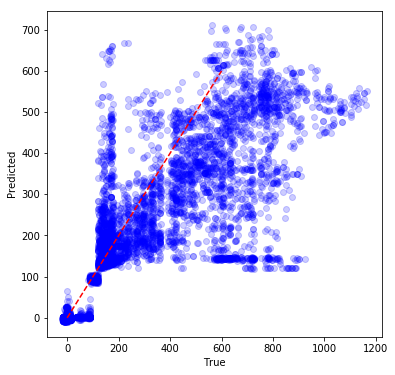

In [67]:
plt.figure(figsize=(6,6))
plt.plot(y, gb_pred, 'bo', alpha=0.2)
plt.plot([0, 600], [0, 600], 'r--')
plt.xlabel('True')
plt.ylabel('Predicted')

In [68]:
lr = LinearRegression()
kf = KFold(n_splits=5, random_state=123)
lr_pred = cross_val_predict(lr, X, y, cv=kf)
print('R2:', r2_score(y, lr_pred))
print('RMSE:', np.sqrt(mean_squared_error(y, lr_pred)))

R2: 0.605052486180421
RMSE: 56.54039600854803
